Import libraries 

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
import weightedcalcs as wc

In [60]:
with open('../data/processed/df.pickle', 'rb') as file:
    df = pickle.load(file)

Set up function for weighting observations

In [61]:
weight = df['weight']
calc = wc.Calculator('weight')

<br>
<b>Generally speaking, do you think of yourself as a ...?</b>
    <br>(Party identification)

Calculate weighted distribution of responses

In [62]:
party_freq_series = calc.distribution(df, 'pid3_2016').round(3)
party_list = ['Democrat', 'Republican', 'Independent', 'Other', 'Not Sure']
party_freq_dict = dict(party_freq_series)
for ind, val in enumerate(party_freq_dict.values()):
    print(party_list[ind], val)

Democrat 0.36
Republican 0.294
Independent 0.296
Other 0.018
Not Sure 0.031


Set set colors for plot

In [63]:
clrs_party = ['cornflowerblue', 'tomato', 'purple', 'lightgrey', 'dimgrey']

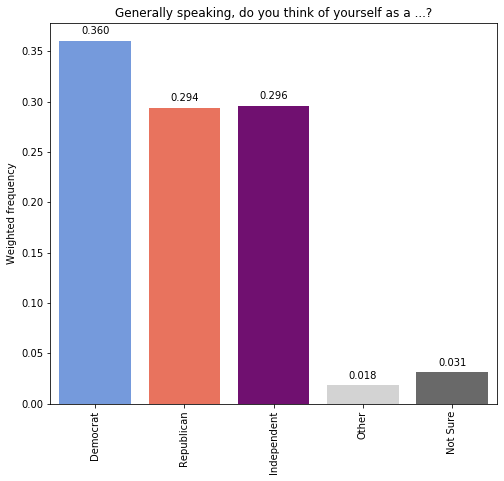

In [64]:
plt.figure(figsize=(8, 7))
bar_plot = sns.barplot(x=party_list,
                       y=list(party_freq_series),
                       palette=clrs_party)
bar_plot.set_xticklabels(rotation=90, labels=party_list)
bar_plot.set_title('Generally speaking, do you think of yourself as a ...?')
bar_plot.set_ylabel('Weighted frequency')
# add labels to bars
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.3f'), (bar.get_x() + bar.get_width() / 2.,
                                                        bar.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


Which <b>features</b> are correlated with <i>party</i>?

In [65]:
df.corr()['pid3_2016'].sort_values(ascending=False).head(10)

pid3_2016            1.000000
post_pid3_2012       0.702563
pid3_baseline        0.578848
pid7_2016            0.504512
post_pid7_2012       0.455840
pp_demprim16_2016    0.455295
pid7_baseline        0.438591
fav_hrc_2016         0.423551
obamaapp_2016        0.407291
fav_obama_2016       0.379822
Name: pid3_2016, dtype: float64

In [1]:
# climate

In [84]:
climate_freq = calc.distribution(df_no_nulls, 'imiss_l_2016').round(3)
print('weighted frequency:', climate_freq)

NameError: name 'df_no_nulls' is not defined

In [85]:
climate_list = []
for i in climate_freq:
    climate_list.append(i)
print(climate_list)
plt.figure(figsize=(8,8))
x = ['Very','Somewhat','Not very','Unimportant','No Response']
bplot = sns.barplot(x = x, y = climate_list, palette='Greens_d')
bplot.set_xticklabels(rotation=90, labels= x)
bplot.set_title('Survey Responses: How important of an issue is climate change?')
bplot.set_ylabel('Weighted Frequency')
for p in bplot.patches:
 bplot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.show()

NameError: name 'climate_freq' is not defined

### Climate change

In [ ]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_l_2016').round(3)
print(res)

In [ ]:
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: Climate change')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

### The budget deficit

In [ ]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_p_2016').round(3)
print(res)

In [ ]:
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: The Budget deficit')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

### Abortion

In [ ]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_t_2016').round(3)
print(res)
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: Abortion')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

### Size of government

In [ ]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_u_2016').round(3)
print(res)
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: Size of government')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()